In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import scipy.stats as stats

In [2]:
cost_of_living_df = pd.read_csv("./cost_of_living_data.csv",index_col="City",
                                encoding="utf-8")
#cost_of_living_df.columns

In [3]:
glassdoor_job_title_df = pd.read_csv("./glassdoor_job_title_data.csv",
                                encoding="utf-8")

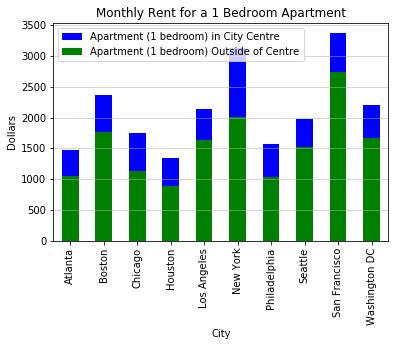

In [74]:
# Alternative plotting method
# x_axis = np.arange(len(cost_of_living_df.index))
# y_values = cost_of_living_df['Apartment (1 bedroom) in City Centre'].astype(float)
# plt.bar(x_axis, y_values, 
#         color='b', alpha=0.5, align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, cost_of_living_df.index, rotation="vertical")
# plt.ylim(0, max(y_values)+500)
# plt.xlabel("City")
# plt.ylabel("Apartment (1 bedroom) in City Centre")
# plt.show()

ax = plt.gca()
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) in City Centre',color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) Outside of Centre',color='g',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='upper left')
ax.yaxis.grid(linewidth=0.5)
plt.title("Monthly Rent for a 1 Bedroom Apartment")
plt.savefig("1BR_APT.png", figsize=(16.195, 5.195), dpi=600)
plt.show()

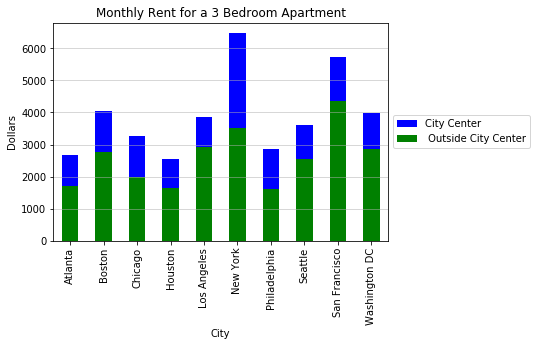

In [75]:
ax = plt.gca()
cost_of_living_df.plot(kind='bar',y='Apartment (3 bedrooms) in City Centre', label = 'City Center' , color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (3 bedrooms) Outside of Centre', label =' Outside City Center', color='g',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(linewidth=0.5)
plt.title("Monthly Rent for a 3 Bedroom Apartment")
plt.savefig("3BR_APT.png", dpi=600)
plt.show()

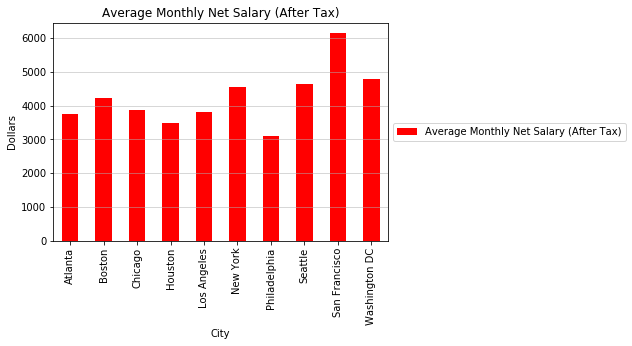

In [6]:
cost_of_living_df.plot(kind='bar',y='Average Monthly Net Salary (After Tax)',color='r')
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y',linewidth=0.5)
plt.title("Average Monthly Net Salary (After Tax)")
plt.show()

In [7]:
# Add a column that has monthly salary based on annual salary
glassdoor_job_title_df["Monthly"] = glassdoor_job_title_df["Value"]/12
glassdoor_job_title_df.head()

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY,mnth,yr,Monthly
0,National,Job Title,2017-06,Software Engineer,Median Base Pay,85880.0,0.028,6,2017,7156.666667
1,National,Job Title,2017-06,Programmer Analyst,Median Base Pay,67889.0,0.026,6,2017,5657.416667
2,National,Job Title,2017-06,Consultant,Median Base Pay,71306.0,0.006,6,2017,5942.166667
3,National,Job Title,2017-06,Project Manager,Median Base Pay,72571.0,0.004,6,2017,6047.583333
4,National,Job Title,2017-06,Store Manager,Median Base Pay,48199.0,0.028,6,2017,4016.583333


In [8]:
#glassdoor_job_title_df["Measure"].unique()
#glassdoor_job_title_df["Month"].unique()
# Number of job titles
print("There's {0} job titles in the Glassdoor dataset.".format(glassdoor_job_title_df["Dimension"].nunique()))
#glassdoor_job_title_df["Dimension"].unique()

There's 85 job titles in the Glassdoor dataset.


In [9]:
# what job titles have highest median base pay in which location
# glassdoor_job_title_df.groupby(["yr","Dimension"]).apply(lambda x: (x.groupby('Metro')
#                                       .mean()
#                                       .sort_values('Value', ascending=False))
#                                      .head(11))['Value']
glassdoor_job_title_2019 = glassdoor_job_title_df[glassdoor_job_title_df["yr"]==2019]
df_2019 = glassdoor_job_title_2019.groupby(["Dimension"]).apply(lambda x: (x.groupby('Metro')
                                      .mean())
#                                      .sort_values('Value', ascending=False))
                                     .head(11))['Monthly']
job_title_interest = "Data Scientist"
df_2019[job_title_interest]

Metro
Atlanta           8293.541667
Boston            9319.666667
Chicago           8681.375000
Houston           9140.916667
Los Angeles       9708.208333
National          8030.166667
New York City     9481.625000
Philadelphia      8695.833333
San Francisco    11538.291667
Seattle          10569.791667
Washington DC     8910.583333
Name: Monthly, dtype: float64

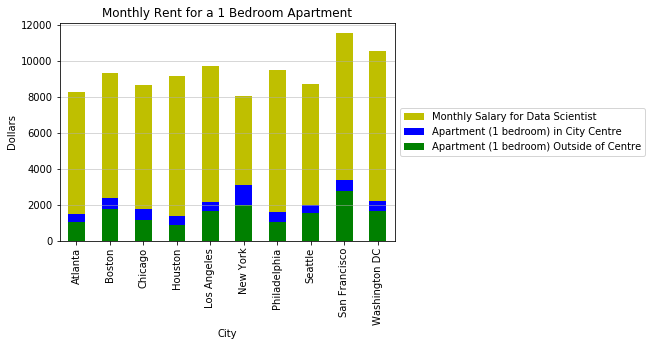

In [10]:
ax = plt.gca()
df_2019[job_title_interest].plot(kind='bar',y=('Salary for {0}').format(job_title_interest),
                                 label =('Monthly Salary for {0}').format(job_title_interest), color='y',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) in City Centre',color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) Outside of Centre',color='g',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(linewidth=0.5)
plt.title("Monthly Rent for a 1 Bedroom Apartment")
plt.show()

In [11]:
# Created a column with Date object for plotting purposes
glassdoor_job_title_df['Date'] = [datetime.strptime(month, '%Y-%m') for month in glassdoor_job_title_df['Month']]
#glassdoor_job_title_df.head()

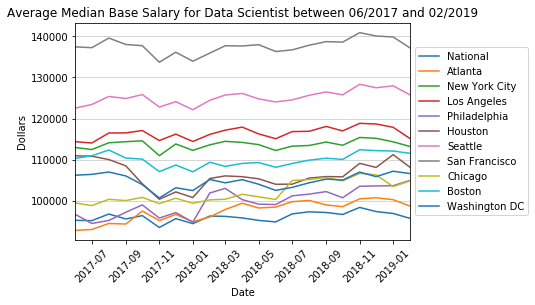

In [12]:
#timeseries for <job title> and <location>
job_title_interest = "Data Scientist"
#job_title_interest = "Accountant"

job_df = glassdoor_job_title_df[glassdoor_job_title_df['Dimension']==job_title_interest]
#job_df_group = job_df.groupby(["Metro"])['Value']
#job_df_group.plot()
fig, ax = plt.subplots()
for metro in job_df["Metro"].unique():
    df = job_df[job_df["Metro"]==metro]
    plt.plot(df["Date"],df["Value"],label=metro)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.xlim(min(df["Date"]),max(df["Date"]))
plt.ylabel("Dollars")
plt.grid(axis='y',linewidth=0.5)
plt.title("Average Median Base Salary for {0} between 06/2017 and 02/2019".format(job_title_interest))
plt.show()

In [13]:
# top five job titles with highest median base pay
top_five = glassdoor_job_title_df.groupby(["Metro","yr"]).apply(lambda x: (x.groupby('Dimension')
                                      .mean()
                                      .sort_values('Value', ascending=False))
                                     .head(5))['Value']

In [14]:
# top five job titles with highest median base pay in Chicago 2017-2019
top_five['Chicago']

yr    Dimension          
2017  Pharmacist             120487.285714
      Solutions Architect    109848.857143
      Attorney               106832.714286
      Tax Manager            103066.571429
      Data Scientist          99965.857143
2018  Pharmacist             120629.416667
      Attorney               113901.666667
      Solutions Architect    113249.916667
      Tax Manager            104378.833333
      Data Scientist         103068.333333
2019  Pharmacist             121928.000000
      Solutions Architect    116839.500000
      Attorney               112117.000000
      Data Scientist         104176.500000
      Tax Manager            103218.000000
Name: Value, dtype: float64

In [15]:
# Average median base pay for listed job titles grouped by year and city\
job_year_location = glassdoor_job_title_df.groupby(["Dimension","yr","Metro"])['Value'].mean()
job_year_location

Dimension      yr    Metro        
Accountant     2017  Atlanta           56405.375000
                     Boston            62517.142857
                     Chicago           59523.571429
                     Houston           58991.857143
                     Los Angeles       60892.571429
                     National          55376.000000
                     New York City     62866.285714
                     Philadelphia      57922.714286
                     San Francisco     70834.142857
                     Seattle           62111.428571
                     Washington DC     64442.142857
               2018  Atlanta           57752.000000
                     Boston            63046.250000
                     Chicago           60686.916667
                     Houston           60074.333333
                     Los Angeles       62004.333333
                     National          56404.666667
                     New York City     64224.416667
                     Philadel

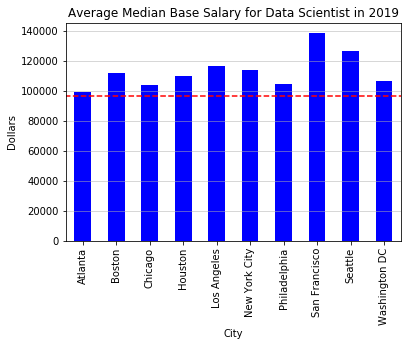

In [16]:
# Average median base salary for <job title> in <year> 
job_title_interest = 'Data Scientist'
year_interest = 2019

national = job_year_location[job_title_interest][year_interest]['National']
job_year_location_new = job_year_location[job_title_interest][year_interest].drop('National')
#job_year_location[job_title_interest][year_interest].plot(kind="bar",color='b')
job_year_location_new.plot(kind="bar",color='b')
plt.xlabel("City")
plt.ylabel("Dollars")
plt.hlines(national,xmin=-1,xmax=10,colors='r',linestyles='dashed')
plt.grid(axis='y',linewidth=0.5)
plt.title("Average Median Base Salary for {0} in {1}".format(job_title_interest,year_interest))
plt.show()

<h1>An attempt at some statistical tests</h1>

In [17]:
# Compares the salaries for two cities

In [18]:
cityA = "Chicago"
cityB = "Philadelphia"
cityA_2019 = glassdoor_job_title_2019[glassdoor_job_title_2019['Metro']==cityA]
cityA_201901 = cityA_2019[cityA_2019['Month']=="2019-01"]
cityB_2019 = glassdoor_job_title_2019[glassdoor_job_title_2019['Metro']==cityB]
cityB_201901 = cityB_2019[cityB_2019['Month']=="2019-01"]

In [19]:
print(cityA_201901['Value'].mean())
print(cityB_201901['Value'].mean())

63541.916666666664
62493.666666666664


In [20]:
# compares the salaries for two cities based on the 85 job titles
stats.ttest_rel(cityA_201901['Value'],cityB_201901['Value'])

Ttest_relResult(statistic=3.844623398944073, pvalue=0.00023573599024894306)

In [21]:
# dataframe that maps the city name to its row number
get_city_row = pd.DataFrame({'City' : cost_of_living_df.index, 
    'Index' : pd.Series(np.arange(0,10))} )
get_city_row = get_city_row.set_index('City')
get_city_row = get_city_row.T

In [22]:
# gets the row number of the cities of interest
cityA_ind = get_city_row[cityA][0]
cityB_ind = get_city_row[cityB][0]

In [23]:
# compares across all the variables of cost of living
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind].values, cost_of_living_df.iloc[cityB_ind].values)

Ttest_relResult(statistic=-0.8622178171772209, pvalue=0.39238062621352954)

In [24]:
print(cost_of_living_df.iloc[cityA_ind,47:52].values.mean())
print(cost_of_living_df.iloc[cityB_ind,47:52].values.mean())

1688.938
1472.0459999999998


In [25]:
# compares the rent and apartment price variables of cost of living
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,47:52].values, cost_of_living_df.iloc[cityB_ind,47:52].values)

Ttest_relResult(statistic=2.8766009380968014, pvalue=0.04516733792285004)

In [26]:
#rename the column to monthly
cost_of_living_df["International Primary School, Yearly for 1 Child"] = cost_of_living_df["International Primary School, Yearly for 1 Child"]/12

In [27]:
# compares the restaurant variables of cost of living
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,0:8].values, cost_of_living_df.iloc[cityB_ind,0:8].values)

Ttest_relResult(statistic=1.1240705378869553, pvalue=0.2980475679669718)

In [28]:
# compares the food/market variables of cost of living
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,8:27].values, cost_of_living_df.iloc[cityB_ind,8:27].values)

Ttest_relResult(statistic=-2.4856081907997924, pvalue=0.022984857028215303)

In [29]:
# compares the transportation variables of cost of living
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,28:35].values, cost_of_living_df.iloc[cityB_ind,28:35].values)

Ttest_relResult(statistic=-1.015662315604393, pvalue=0.34898248870740306)

In [30]:
# compares the monthly utilities
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,35:38].values, cost_of_living_df.iloc[cityB_ind,35:38].values)

Ttest_relResult(statistic=-1.4547549389864773, pvalue=0.28297268337035497)

In [31]:
# compares the sports and leisure variables
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,38:41].values, cost_of_living_df.iloc[cityB_ind,38:41].values)

Ttest_relResult(statistic=0.3216677532294791, pvalue=0.7782113335660915)

In [32]:
# compares the childcare variables
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,41:43].values, cost_of_living_df.iloc[cityB_ind,41:43].values)

Ttest_relResult(statistic=-0.9879881895047647, pvalue=0.5038465334185447)

In [33]:
# compares the clothings and accessories variables
stats.ttest_rel(cost_of_living_df.iloc[cityA_ind,43:47].values, cost_of_living_df.iloc[cityB_ind,43:47].values)

Ttest_relResult(statistic=2.725472812905913, pvalue=0.07221548279509489)

In [34]:
cityA_housing_mean = cost_of_living_df.iloc[cityA_ind,47:52].values.mean()
cityA_restaurants = 4*cost_of_living_df.iloc[cityA_ind,0:8].values.sum()
cityA_groceries = 4*cost_of_living_df.iloc[cityA_ind,8:27].values.sum()
cityA_transportation = cost_of_living_df.iloc[cityA_ind,28:33].values.mean()
cityA_utilities_sum = cost_of_living_df.iloc[cityA_ind,35:38].values.sum()
cityA_leisure_sum = cost_of_living_df.iloc[cityA_ind,38:41].values.sum()
cityA_childcare_mean = cost_of_living_df.iloc[cityA_ind,41:43].values.mean()
#cityA_clothing_mean = cost_of_living_df.iloc[cityA_ind,43:47].values.mean()

cityB_housing_mean = cost_of_living_df.iloc[cityB_ind,47:52].values.mean()
cityB_restaurants = 4*cost_of_living_df.iloc[cityB_ind,0:8].values.sum()
cityB_groceries = 4*cost_of_living_df.iloc[cityB_ind,8:27].values.sum()
cityB_transportation = cost_of_living_df.iloc[cityB_ind,28:33].values.mean()
cityB_utilities_sum = cost_of_living_df.iloc[cityB_ind,35:38].values.sum()
cityB_leisure_sum = cost_of_living_df.iloc[cityB_ind,38:41].values.sum()
cityB_childcare_mean = cost_of_living_df.iloc[cityB_ind,41:43].values.mean()
#cityB_clothing_mean = cost_of_living_df.iloc[cityB_ind,43:47].values.mean()

In [35]:
index_monthly=["housing","restaurants","groceries","transportation","utilities","leisure","childcare"]

In [36]:
city_compare_living = pd.DataFrame(np.array([[cityA_housing_mean, cityB_housing_mean], 
                                             [cityA_restaurants, cityB_restaurants],
                                             [cityA_groceries, cityB_groceries],
                                             [cityA_transportation, cityB_transportation],
                                             [cityA_utilities_sum, cityB_utilities_sum], 
                                             [cityA_leisure_sum, cityB_leisure_sum],
                                             [cityA_childcare_mean, cityB_childcare_mean]]), 
#                                             [cityA_clothing_mean, cityB_clothing_mean]]),
                                             columns=[cityA,cityB], index=index_monthly)

In [37]:
city_compare_living

,Chicago,Philadelphia
housing,1688.938,1472.046
restaurants,422.080,399.880
groceries,258.640,304.600
transportation,27.532,25.988
utilities,187.060,213.210
leisure,87.190,79.050
childcare,1172.260,1466.720


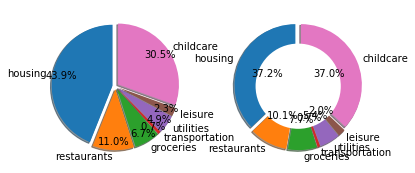

In [38]:
#city_compare_living.plot(kind="bar")
explode= (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
f, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.pie(city_compare_living[cityA].values,explode=explode,
        autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
       startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax2.pie(city_compare_living[cityB].values,explode=explode,
        autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
       startangle=90, pctdistance=0.5)
#plt.tight_layout()
plt.show()

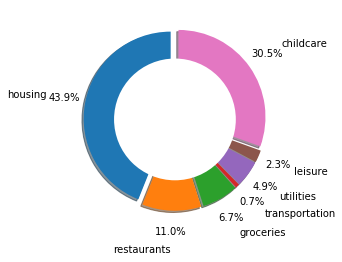

In [49]:
plt.pie(city_compare_living[cityA].values,explode=explode,
        autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
       startangle=90, pctdistance=1.25, labeldistance=1.45)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("ChicagoCOL.png", dpi=600)
plt.show()


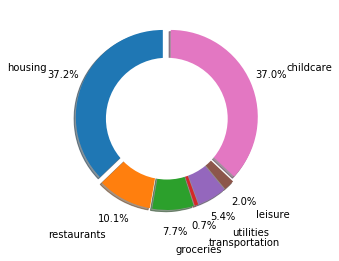

In [53]:
plt.pie(city_compare_living[cityB].values,explode=explode,
        autopct="%1.1f%%",labels=city_compare_living.index,shadow=True,
       startangle=90, pctdistance=1.25, labeldistance=1.45)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.savefig("PhillyCOL.png", dpi=600)
plt.show()

